# Pytorch

### Pytorch and Numpy  区别

torch.FloatTensor(list)   转 tensor
<br>
torch.abs()
<br>
torch.mm( tensor, tensor)   矩阵相乘  matmul
<br>
torch.dot

In [1]:
import torch 
import numpy as np

In [2]:
np_data = np.arange(6).reshape((2,3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy',np_data,
    '\ntorch',torch_data,
    '\ntensor2array', tensor2array
)
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)
print(
    '\nabs',
    '\nnumpy:', np.abs(data),
    '\ntorch:', torch.abs(tensor)
)
data = [[1,2],[3,4]]
tensor = torch.FloatTensor(data)
data = np.array(data)
print(
    'matmul',
    '\nnumpy:',data.dot(data),
    '\ntorch:',torch.mm(tensor,tensor)
)


numpy [[0 1 2]
 [3 4 5]] 
torch tensor([[0, 1, 2],
        [3, 4, 5]]) 
tensor2array [[0 1 2]
 [3 4 5]]

abs 
numpy: [1 2 1 2] 
torch: tensor([1., 2., 1., 2.])
matmul 
numpy: [[ 7 10]
 [15 22]] 
torch: tensor([[ 7., 10.],
        [15., 22.]])


### Variable

In [3]:
from torch.autograd import Variable
tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor, requires_grad = True)
print('\ntensor:',tensor,
      '\nvariable:', variable
     )
t_out = torch.mean(tensor * tensor)  # x^2
v_out = torch.mean(variable * variable) 
print('\nt_out:',t_out,
      '\nv_out:', v_out
     )
v_out.backward()
# v_out = 1/4 * sum(var * var)
# d(v_out) / d(var) = 1/4 * 2 * var = var / 2
print(variable.grad)
print(variable.data)


tensor: tensor([[1., 2.],
        [3., 4.]]) 
variable: tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

t_out: tensor(7.5000) 
v_out: tensor(7.5000, grad_fn=<MeanBackward0>)
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
tensor([[1., 2.],
        [3., 4.]])


### Activation

/home/xingyu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/xingyu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


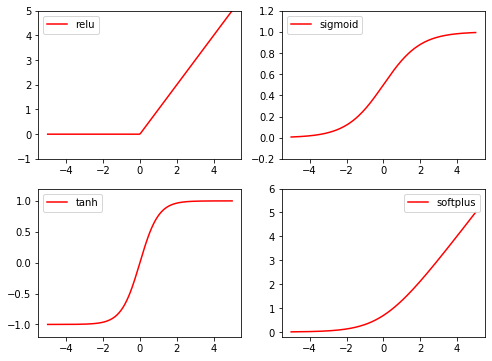

In [4]:
import torch
import torch.nn.functional as  F
from torch.autograd import Variable
import matplotlib.pyplot as plt

#fake data
x = torch.linspace(-5, 5, 200)
x = Variable(x)
x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

plt.figure(1, figsize=(8,6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim(-1,5)
plt.legend(loc='best')
plt.figure(1, figsize=(8,6))
plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim(-0.2,1.2)
plt.legend(loc='best')
plt.figure(1, figsize=(8,6))
plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim(-1.2,1.2)
plt.legend(loc='best')
plt.figure(1, figsize=(8,6))
plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim(-0.2,6)
plt.legend(loc='best')
plt.show()

### Regression 回归

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


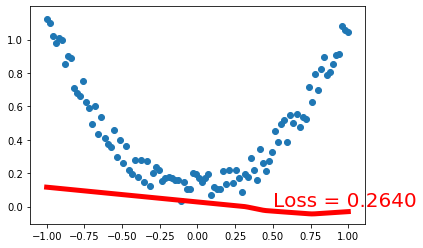

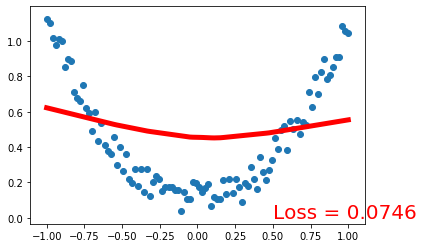

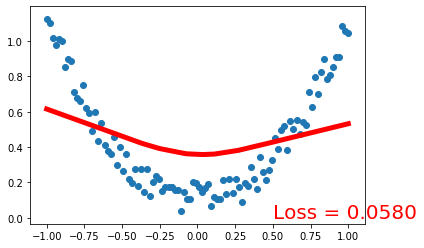

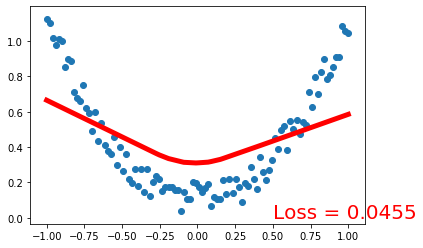

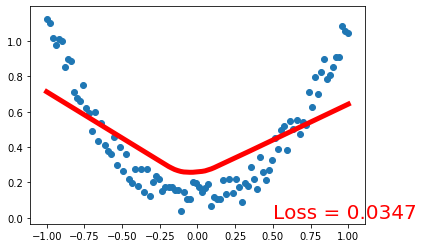

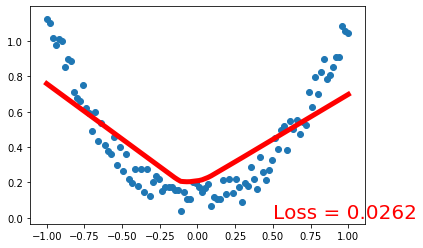

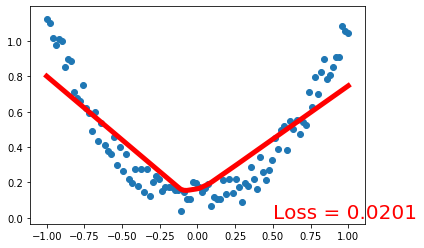

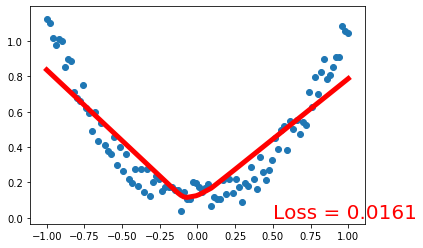

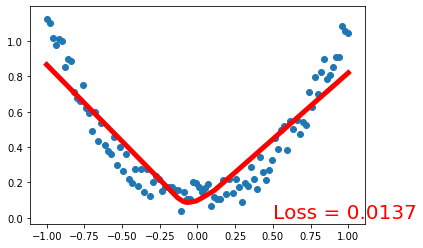

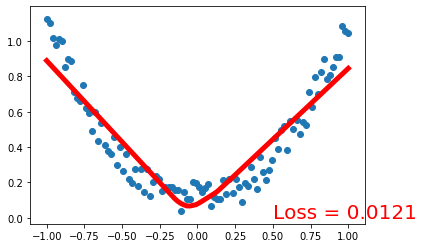

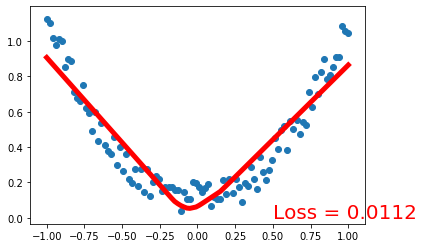

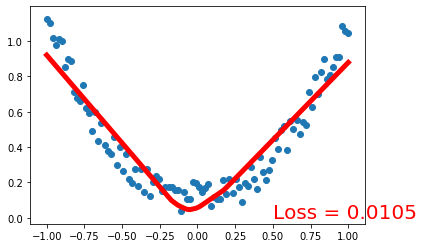

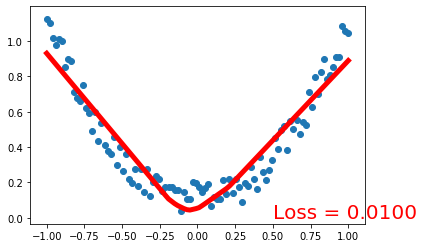

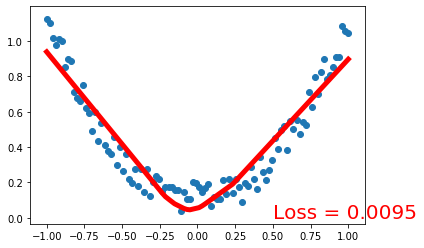

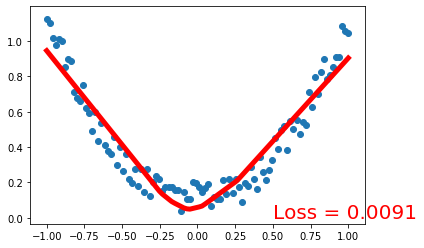

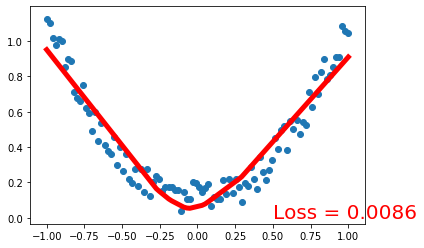

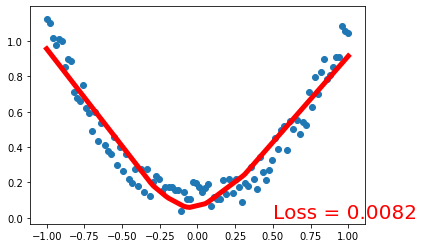

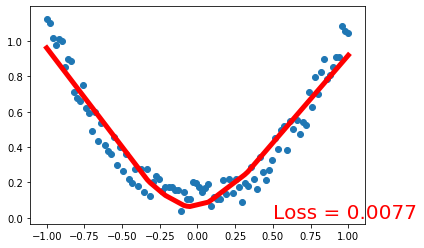

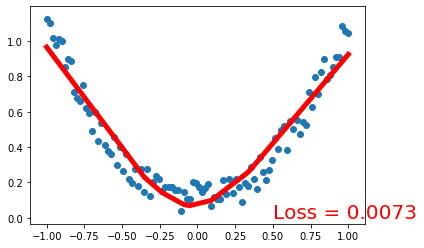

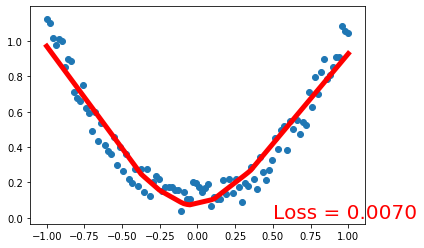

In [5]:
import torch
import torch.nn.functional as  F
from torch.autograd import Variable
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
y = x.pow(2) + 0.2 * torch.rand(x.size())
x, y = Variable(x), Variable(y)

#plt.scatter(x.data.numpy(), y.data.numpy())
#plt.show()

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
         
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
net = Net(1, 10, 1)
print(net)

plt.ion()
plt.show()
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
"""
: lr  learning_rate 
: net.parameters()  传入参数
"""
for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss = %.4f'% loss.item(), fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
    plt.ioff()
    plt.show()

### Classification 分类


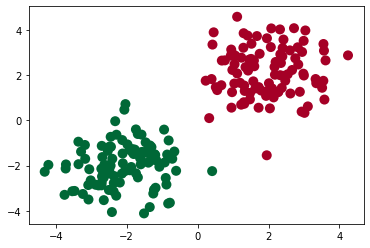

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


/home/xingyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


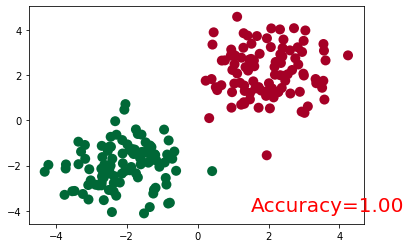

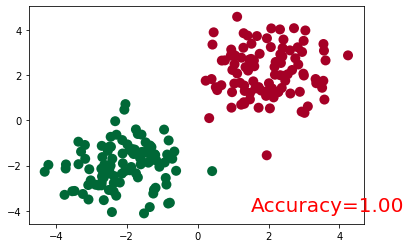

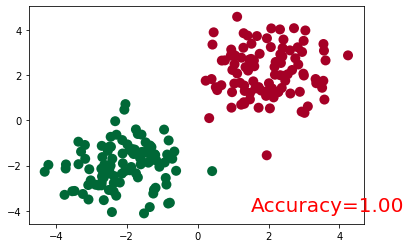

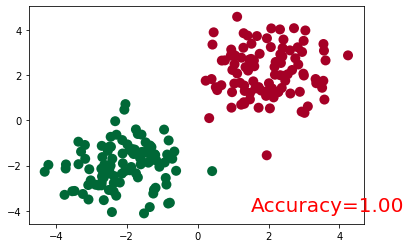

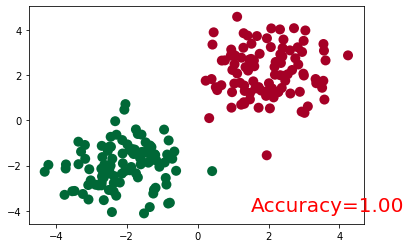

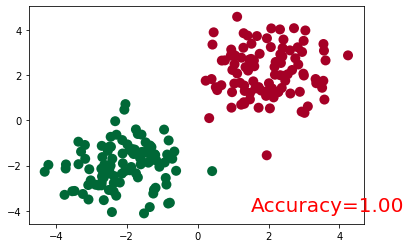

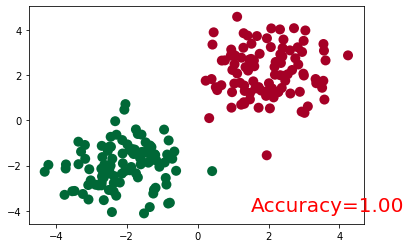

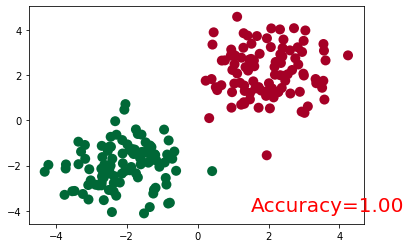

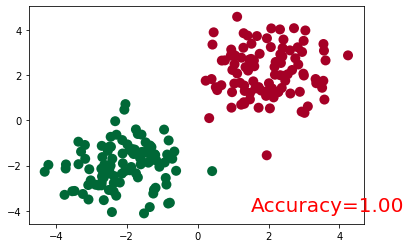

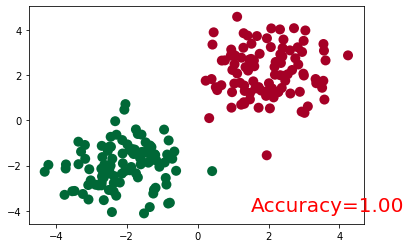

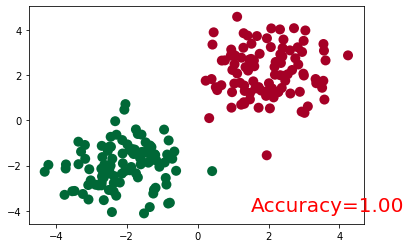

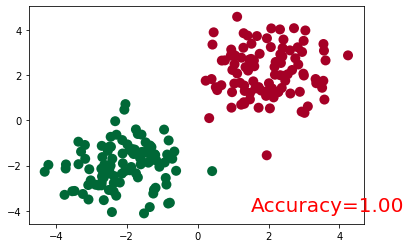

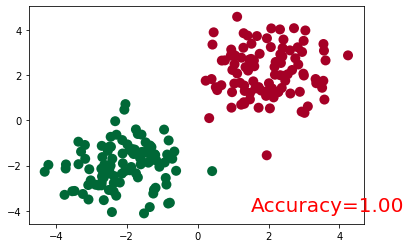

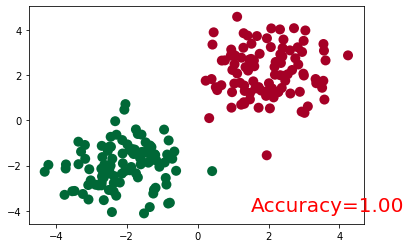

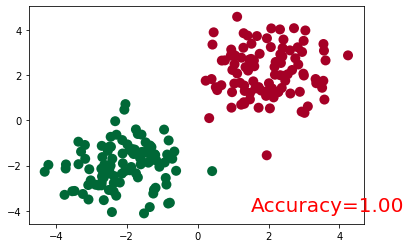

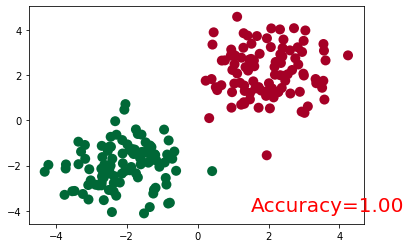

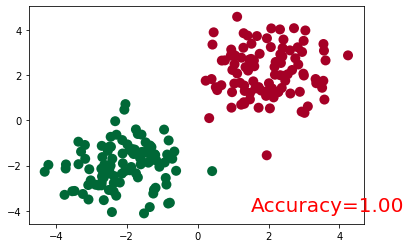

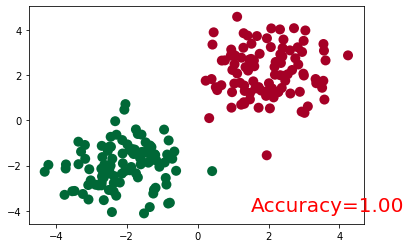

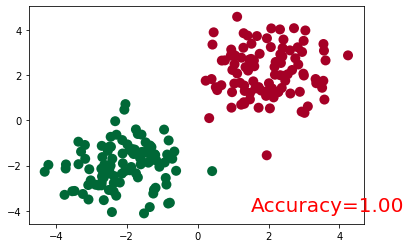

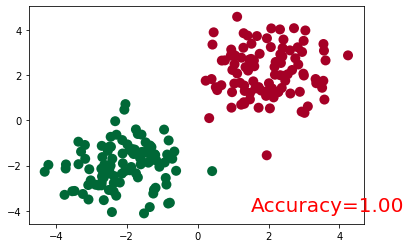

In [6]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

n_data = torch.ones(100,2)
x0 = torch.normal(2 * n_data, 1)    
y0 = torch.zeros(100)
x1 = torch.normal(-2 * n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1),0).type(torch.FloatTensor)
y = torch.cat((y0, y1),).type(torch.LongTensor)  # 标签默认 LongTensor

x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()
class ClassNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = predict(x)
        return x
net = Net(2,10,2)
print(net)
plt.ion()   # 画图
plt.show()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()
# 对于 001 0001  用到 CrossEntropyLoss  交叉熵
# 回归问题用 MSELoss
#  输出的是   概率  [0.1, 0.2 ,0.7]  = 1
for t in range(100):
    out = net(x)
    
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 5 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
plt.ioff()  # 停止画图
plt.show()

## 快速搭建法

对于上述分类网络搭建

In [7]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2),
)
print(net2)


Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


### 保存和提取神经网络

In [8]:
torch.manual_seed(1)    # reproducible

# 假数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

def save():
    # 建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    # 训练
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    torch.save(net1, 'net.pkl') # entire net
    torch.save(net1.state_dict(), 'net_params.pkl')  # parameters
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
def restore_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

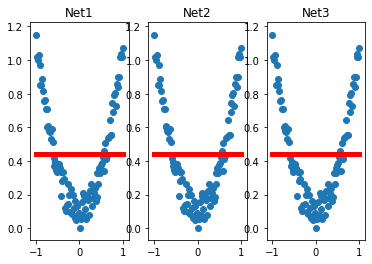

In [9]:
save()
restore_net()
restore_params()

### 批训练

In [10]:
import torch
import torch.utils.data as Data  #进行bitch

BATCH_SIZE = 8

x = torch.linspace(1, 10, 10)
y = torch.linspace(10, 1, 10)

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
        dataset = torch_dataset,
        batch_size = BATCH_SIZE,
        shuffle = True, # 是否打乱数据
        num_workers = 2, #每一次loader 用2个线程提取
)

for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        # training ...
        print('Epoch:', epoch, '| Step:', step, 
              '| batch x:', batch_x.numpy(), '| batch y:', batch_y.numpy())
        

Epoch: 0 | Step: 0 | batch x: [10.  9.  5.  7.  2.  1.  4.  6.] | batch y: [ 1.  2.  6.  4.  9. 10.  7.  5.]
Epoch: 0 | Step: 1 | batch x: [3. 8.] | batch y: [8. 3.]
Epoch: 1 | Step: 0 | batch x: [9. 5. 6. 7. 2. 1. 4. 8.] | batch y: [ 2.  6.  5.  4.  9. 10.  7.  3.]
Epoch: 1 | Step: 1 | batch x: [ 3. 10.] | batch y: [8. 1.]
Epoch: 2 | Step: 0 | batch x: [ 9.  1.  5. 10.  7.  2.  4.  3.] | batch y: [ 2. 10.  6.  1.  4.  9.  7.  8.]
Epoch: 2 | Step: 1 | batch x: [6. 8.] | batch y: [5. 3.]


### Optimizer 优化器

0
1
2
3
4
5
6
7
8
9
10
11


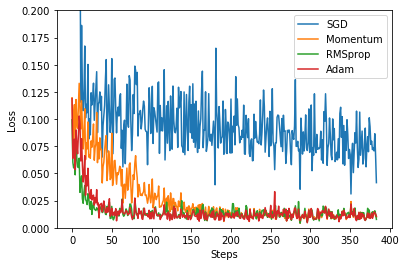

In [11]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import  matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible
EPOCH = 12 
LR = 0.01
BATCH_SIZE = 32

x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim = 1)
y = x.pow(2) + 0.1 * torch.normal(torch.zeros(* x. size()))
# plt dataset
#plt.scatter(x.numpy(), y.numpy())
#plt.show()
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE,
                        shuffle= True, num_workers = 2)
# define NN
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
# different Nets
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha =0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9,0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]]
for epoch in range(EPOCH):
    print(epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x, b_y = Variable(batch_x), Variable(batch_y)
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)
            loss = loss_func(output, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.item())

labels = ['SGD','Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label = labels[i])
plt.legend(loc ='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

### 卷积神经网络

torch.Size([60000, 28, 28])
torch.Size([60000])


/home/xingyu/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/xingyu/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


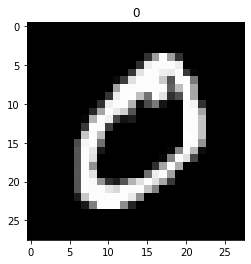

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

# Hyper Parameters
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MINIST = False

train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train = True,
    transform = torchvision.transforms.ToTensor(),  #(0, 1)   (0-255)
    download = DOWNLOAD_MINIST
)
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[1].numpy(), cmap = 'gray')
plt.title('%i' % train_data.train_labels[1])
plt.show()

In [2]:
# 处理数据
train_loader = Data.DataLoader(dataset = train_data, 
                               batch_size = BATCH_SIZE,
                               shuffle =True, num_workers = 2)
test_data = torchvision.datasets.MNIST(root = './mnist', train =False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels[:2000]
test_x = Variable(test_x)
test_y = Variable(test_y)
# 构建CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(   #(1, 20, 20)
                in_channels = 1,    #通道数
                out_channels = 16,  # 卷积核的个数
                kernel_size = 5,   # 卷积核尺寸
                stride = 1,
                padding = 2,  
            #if stride = 1, padding = (kernel_size -1)/2 = (5-1)/2
            ),  # -> (16,28,28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),  # ->(16, 14, 14) 
        )                
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),   # ->(32, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(2)          # -> (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)   # (batch, 32, 7 ,7)
        x = x.view(x.size(0), -1)  # (batch, (32 * 7 * 7 )
        output = self.out(x)
        return output
cnn = CNN()
print(cnn)
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

# 训练 

    

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


/home/xingyu/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/xingyu/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
test_y[0]

tensor(7)

In [3]:

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        
        output = cnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0 :
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.true_divide(sum(pred_y == test_y), test_y.size(0))
            print("Epoch :", epoch, '| train loss: %.4f' % loss.item(),
                 '| test accuracy:', accuracy)
test_output = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

Epoch : 0 | train loss: 2.2873 | test accuracy: tensor(0.1720)
Epoch : 0 | train loss: 0.6347 | test accuracy: tensor(0.8135)
Epoch : 0 | train loss: 0.5569 | test accuracy: tensor(0.8825)
Epoch : 0 | train loss: 0.1926 | test accuracy: tensor(0.9055)
Epoch : 0 | train loss: 0.3402 | test accuracy: tensor(0.9385)
Epoch : 0 | train loss: 0.1148 | test accuracy: tensor(0.9430)
Epoch : 0 | train loss: 0.0637 | test accuracy: tensor(0.9555)
Epoch : 0 | train loss: 0.2037 | test accuracy: tensor(0.9525)
Epoch : 0 | train loss: 0.0880 | test accuracy: tensor(0.9635)
Epoch : 0 | train loss: 0.2217 | test accuracy: tensor(0.9665)
Epoch : 0 | train loss: 0.0527 | test accuracy: tensor(0.9650)
Epoch : 0 | train loss: 0.0633 | test accuracy: tensor(0.9635)
Epoch : 0 | train loss: 0.0408 | test accuracy: tensor(0.9640)
Epoch : 0 | train loss: 0.1205 | test accuracy: tensor(0.9715)
Epoch : 0 | train loss: 0.0267 | test accuracy: tensor(0.9720)
Epoch : 0 | train loss: 0.0614 | test accuracy: tensor(

arracy tensor(0.9770)
tensor(5)


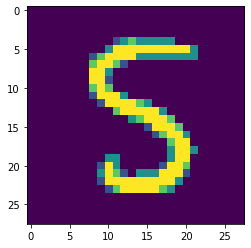

In [58]:
test_x1 = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[2000:4000]/255
test_y1 = test_data.test_labels[2000:4000]
test_x1 = Variable(test_x1)
test_y1 = Variable(test_y1)
test_output1 = cnn(test_x1)
pred_y1 = torch.max(test_output1, 1)[1].data.squeeze()
arracy1 =  torch.true_divide(sum(pred_y1 == test_y1), test_y1.size(0))
print('arracy', arracy1 )
plt.imshow(test_x1[100].numpy().reshape(28,28))
print(pred_y1[100])